# Cancer Data Logistic Regression

In [118]:
import pandas as pd
import os
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import chi2_contingency


In [120]:
data_root = "./"
filename = "Cancer_Data.csv"
filepath = os.path.join(data_root, filename)
df = pd.read_csv(filepath)

In [121]:
def get_data(filename):
    df = pd.read_csv(filename)
    df.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis=1, inplace=True)
    return df    

In [122]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [123]:
df.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], axis=1, inplace=True)

In [124]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,NaN


In [125]:
def pre_process_data(df, one_hot_encode = False):
   # Use sklearn Imputers to fill in the categorical and numerical columns
    simple_median = SimpleImputer(strategy='median')
    simple_most_freq = SimpleImputer(strategy='most_frequent')
    
    num_cols = df.select_dtypes(include=np.number).columns # numerical data
    cat_cols = df.select_dtypes(include=object).columns # categorical data

    df[num_cols] = simple_median.fit_transform(df[num_cols])
    df[cat_cols] = simple_most_freq.fit_transform(df[cat_cols])

    if one_hot_encode:
        O_encoder = OrdinalEncoder()
        df[cat_cols]= O_encoder.fit_transform(df[cat_cols])

        # df = pd.get_dummies(df, dtype=int)
    return df

In [126]:
def get_test_train(df, test_size = 0.2, random_state = True):
    target = "diagnosis"    
    X = df.drop(target, axis=1)
     # add a scaler here. It works by finding a fit first (computing mu and sigma)
    scaler = preprocessing.StandardScaler().fit(X)
    # and then transforming the data
    X = scaler.transform(X)
    
    y = df[target]
    if random_state is True:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size)
    else:
        X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

In [127]:
# These lines would load the data locally
data_root = "./"
filename = "cancer_data_cleaned.csv"
filepath = os.path.join(data_root, filename)

# Perform a logistic regression
df = get_data(filepath)
df = pre_process_data(df, one_hot_encode = True)
X_train, X_test, y_train, y_test = get_test_train(df, random_state = True)
lreg = LogisticRegression()
model = lreg.fit(X_train, y_train)

Get the model score

In [128]:
pred = lreg.predict(X_test)
print(f"Train accuracy  = {model.score(X_train, y_train):.3}")
print(f"Test  accuracy  = {model.score(X_test, y_test):.3}")

Train accuracy  = 0.947
Test  accuracy  = 0.939


Quick snapshot of the confusion matrix (rows are truth  0/1 and cols are predictions 0/1)

In [129]:
confusion_matrix(y_test, lreg.predict(X_test))

array([[70,  2],
       [ 5, 37]])

We want to get the probabilites from X-test, NOT the classifications. So we want raw values in (0,1)

In [130]:
# Get predicted probabilities for the test data
# You need to **CHANGE THIS CODE** and return only a vector of the probabilities for class = 1
y_prob = model.predict_proba(X_test)[:,1]

If we sort y_prob and y_test in the same order, then we can make a reasonable plot

In [131]:
# Sort the data for plotting
sorted_indices = np.argsort(y_prob)
sorted_y_prob = y_prob[sorted_indices]
sorted_y_test = np.array(y_test)[sorted_indices]

In [132]:
# Print the vector of sorted_y_prob and of sorted_y_test to verify the are generally increasing from 0 to 1

In [133]:
sorted_y_prob, sorted_y_test

(array([3.37652783e-05, 3.67350951e-05, 4.37011955e-05, 7.29516306e-05,
        7.96802265e-05, 1.48771407e-04, 1.76809672e-04, 1.96647327e-04,
        2.51157884e-04, 3.56863094e-04, 3.64555158e-04, 6.18519901e-04,
        8.26717795e-04, 1.09973224e-03, 1.20508398e-03, 1.26100981e-03,
        1.47859085e-03, 1.51721772e-03, 1.67481734e-03, 2.56044688e-03,
        3.15121350e-03, 3.52793352e-03, 3.84701824e-03, 4.64226471e-03,
        5.39849633e-03, 5.45764697e-03, 5.64822945e-03, 5.65799845e-03,
        5.71677389e-03, 5.76132666e-03, 5.87455643e-03, 6.13683013e-03,
        7.29160998e-03, 8.21619143e-03, 9.28605298e-03, 9.37095103e-03,
        9.47258860e-03, 1.00027297e-02, 1.08767549e-02, 1.13128466e-02,
        1.16621543e-02, 1.53474472e-02, 1.79036078e-02, 2.05632352e-02,
        2.30174864e-02, 2.30251612e-02, 2.33800373e-02, 2.78053358e-02,
        3.55445026e-02, 3.61378056e-02, 3.80334974e-02, 4.26081689e-02,
        5.50772956e-02, 6.06359266e-02, 6.49358452e-02, 6.854620

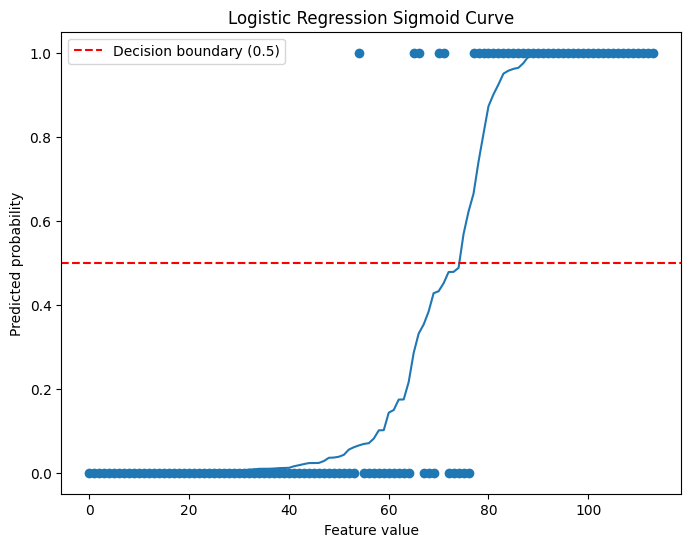

In [134]:
# Plot the sigmoid curve (predicted probabilities)
plt.figure(figsize=(8, 6))

# Plot the sorted_y_prob vector as a line, labeled "Predicted probability" in blue
plt.plot(list(range(len(sorted_y_prob))), sorted_y_prob)

# Plot the sorted_y_test values as a scatter plot, labeled "Actual Probability" in red
plt.scatter(list(range(len(sorted_y_prob))), sorted_y_test)

# Plot the cutoff line (decision boundary at 0.5)
plt.axhline(0.5, color='red', linestyle='--', label='Decision boundary (0.5)')

plt.title('Logistic Regression Sigmoid Curve')
plt.xlabel('Feature value')
plt.ylabel('Predicted probability')
plt.legend()
plt.show()

Binary classification for logistic regression relies on knowing where the 'split point' is. It default to alpha = 0.5, but this may not be optimal. You will define some helper functions to determine an optimal alpha.

In [135]:
def binary_classify(y_prob, alpha):
    # return a vector where index i is 1 if y_prob[i] > alpha, else 0 
    return [1 if x > alpha else 0 for x in y_prob]
    
def tp(true, observed): 
    # return the number of true positives, e.g. indices i where true[i] = observed[i] = 1
    return sum([1 if (x == 1 and y == 1) else 0 for x,y in zip(true,observed)])

def tn(true, observed): 
    return sum([1 if (x == 0 and y == 0) else 0 for x,y in zip(true,observed)])

def fp(true, observed): 
    return sum([1 if (x == 0 and y == 1) else 0 for x,y in zip(true,observed)])

def fn(true, observed): 
    return sum([1 if (x == 1 and y == 0) else 0 for x,y in zip(true,observed)])

def precision(true, observed): 
    return tp(true, observed) / (tp(true, observed) + fp(true, observed))

def recall(true, observed): 
    return tp(true, observed) / (tp(true, observed) + fn(true, observed))
                                 
def score(true, observed, weights):
    tps, fps, tns, fns = weights
    return tps*tp(true,observed) + tns*tn(true, observed) + fps*fp(true, observed) +fns*fn(true, observed)

In [136]:
observed = binary_classify(sorted_y_prob, 0.5)
q = zip(observed, sorted_y_test)
print(precision(sorted_y_test, observed))

0.9487179487179487


Create a plot of recall vs precision for various alpha. Let alpha from from 0 to 100 in steps of 0.01. Compute the new classification, then the precision and recall score. Then plot a scatter plot
of (precision(alpha), recall(alpha)) points. Code is provided to plot the alphas along the graph.

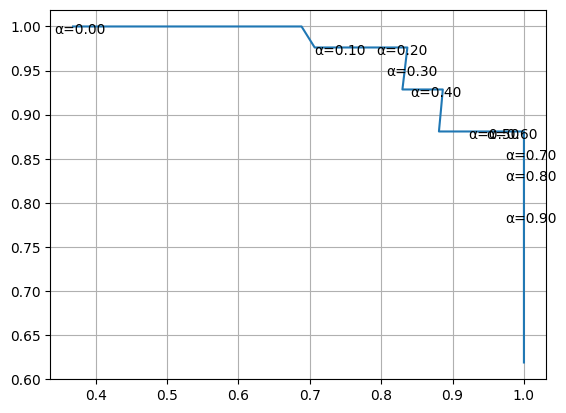

In [137]:
ps = []
rs = []
for i in range(100):
    alpha = i/100.0
    observed = binary_classify(sorted_y_prob, alpha)
    ps += [precision(sorted_y_test, observed)]
    rs += [recall(sorted_y_test, observed)]
plt.plot(ps, rs)
# Annotate alpha values at selected points (for example, every 10th point)
for i in range(0, 100, 10):  # You can change the step size (10) to select more/fewer points
    alpha = i / 100.0
    plt.annotate(f'α={alpha:.2f}', (ps[i], rs[i]), 
                 textcoords="offset points", xytext=(5, -5), ha='center')
plt.grid()

In [138]:
ps = []
rs = []
scores = []
for i in range(100):
    alpha = i/100.0
    observed = binary_classify(sorted_y_prob, alpha)
    ps += [precision(sorted_y_test, observed)]
    rs += [recall(sorted_y_test, observed)]
    scores += [score(sorted_y_test, observed, (0,1,0,1))]

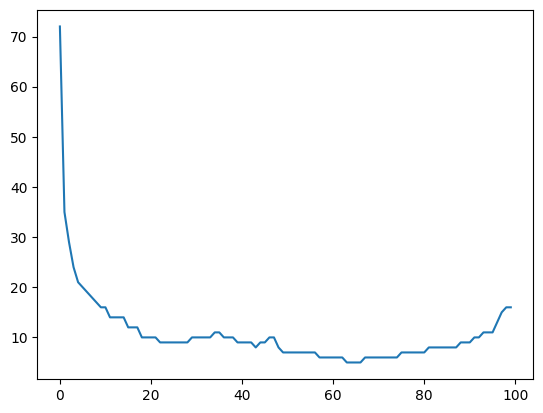

In [139]:
plt.plot(scores);

In [140]:
np.argmin(scores), np.min(scores)

(np.int64(63), np.int64(5))

In [141]:
opt_alpha = np.argmin(scores)/100
observed = binary_classify(sorted_y_prob, opt_alpha)
ps = precision(sorted_y_test, observed)
rs = recall(sorted_y_test, observed)
opt_tp = tp(sorted_y_test, observed)
opt_tn = tn(sorted_y_test, observed)
opt_fp = fp(sorted_y_test, observed)
opt_fn = fn(sorted_y_test, observed)

In [142]:
print(ps, rs, opt_tp, opt_tn, opt_tp, opt_fn)

1.0 0.8809523809523809 37 72 37 5


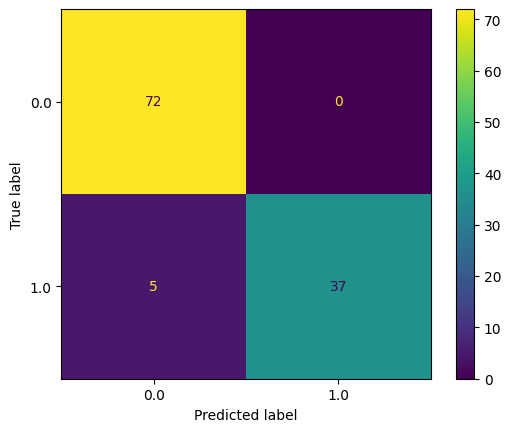

In [143]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(sorted_y_test, observed, labels=lreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lreg.classes_)
disp.plot()
plt.show()

In [144]:
cm

array([[72,  0],
       [ 5, 37]])

In [145]:
precision = cm[1,1]/(cm[1,1]+cm[0,1])
recall = cm[1,1]/(cm[1,1]+cm[1,0])

In [146]:
precision, recall

(np.float64(1.0), np.float64(0.8809523809523809))